# 4.1 Classifying Movie Reviews: A binary Classification Example

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# print(train_data.shape, train_data[0])
# print(test_data.shape, test_data[0])
# print(train_label.shape, train_label[0])
# print(test_label.shape, test_label[0])


from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 256  # keep only the first 256 words of each review
padded_train_data = pad_sequences(train_data, maxlen=maxlen)
padded_test_data = pad_sequences(test_data, maxlen=maxlen)
max(max(sequence) for sequence in train_data)


word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_view = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_view)


import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1;
  return results

x_train = vectorize_sequences(padded_train_data)
x_test = vectorize_sequences(padded_test_data)

print(x_train[0])
print(train_labels)


y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    # layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # Sigmoid is because, finally we want probability
])

model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"]
)


x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=14,
    batch_size=128,
    validation_data=(x_val, y_val)
)
history_dict = history.history
print(history_dict.keys())


import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


model.evaluate(x_test, y_test)



# 4.2 Classifying newswores: A Multiclass classification example

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# print(train_data.shape, train_data[0])
# print(test_data.shape, test_data[0])
# print(train_labels.shape, train_labels[0])
# print(test_labels.shape, test_labels[0])
word_index = reuters.get_word_index()

# print(type(word_index))         # dict
# print(type(word_index.items())) # dict_items

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# print(" ".join(reverse_word_index.get(i - 3, "?") for i in train_data[0]))
# import numpy as np

# def to_one_hot(labels, dimension=46):
#   result = np.zeros((len(labels), dimension))
#   for i, label in enumerate(labels):
#     result[i, label] = 1;
#   return result

# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)


# But there is a built in way to do the same above thing in keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=46, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      result[i, j] = 1
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
print(x_train.shape)
print(y_train.shape)
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data = (x_val, y_val)
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


model.evaluate(x_test, y_test)

# 4.3 Predicting House Prices: A regression example

In [1]:
from tensorflow.keras.datasets import boston_housing
import numpy as np

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# print(train_data.shape)
# print(train_targets.shape)
# print(train_data)
# print(train_targets)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Normalizing the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

# Always remember, we must not do any type of computation with test data
test_data -= mean
test_data /= std

print(train_data)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
      layers.Dense(units=64, activation="relu"),
      layers.Dense(units=64, activation="relu"),
      layers.Dense(units=1),
  ])
  model.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=["mae"]
  )

  return model

In [4]:
# Implementing K-Fold
# We usually do this when we have limited amount of data to train our model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"processing fold #{i}")
  val_data = train_data[num_val_samples * i: num_val_samples * (i + 1)]
  val_targets = train_targets[num_val_samples * i: num_val_samples * (i + 1)]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples],
       train_data[(i + 1) * num_val_samples: ]],
      axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[: i * num_val_samples],
       train_targets[(i + 1) * num_val_samples: ]],
      axis = 0
  )

  model = build_model()
  model.fit(
      partial_train_data,
      partial_train_targets,
      epochs=num_epochs,
      batch_size=16,
      verbose=0                 # Trains the model silently
  )

  val_mse, val_mae = model.evaluate(val_data, val_targets)

  all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

processing fold #0
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 6.7458 - mae: 1.8574
processing fold #1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.1962 - mae: 2.5835
processing fold #2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.8171 - mae: 2.4509
processing fold #3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 11.8514 - mae: 2.3264
[1.9285056591033936, 2.4720547199249268, 2.472956895828247, 2.2143115997314453]
2.271957218647003


In [5]:
# Lets try training the model for longer (500 epochs)

num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f"processing fold #{i}")
  val_data = train_data[num_val_samples * i: num_val_samples * (i + 1)]
  val_targets = train_targets[num_val_samples * i: num_val_samples * (i + 1)]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples],
       train_data[(i + 1) * num_val_samples: ]],
      axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[: i * num_val_samples],
       train_targets[(i + 1) * num_val_samples: ]],
      axis = 0
  )

  model = build_model()
  history = model.fit(
      partial_train_data,
      partial_train_targets,
      epochs=num_epochs,
      batch_size=16,
      validation_data=(val_data, val_targets),
      verbose=0                 # Trains the model silently
  )

  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)



processing fold #0
processing fold #1
processing fold #2
processing fold #3


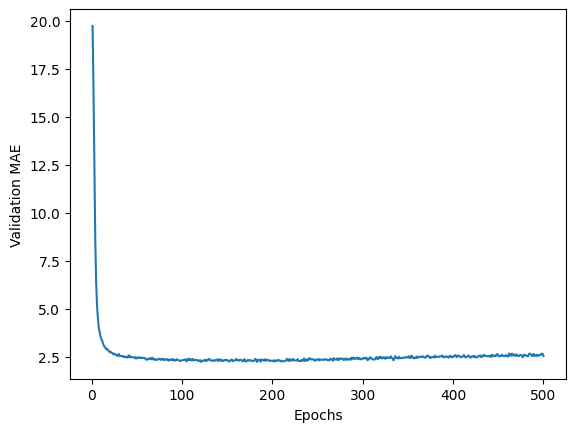

In [6]:
import matplotlib.pyplot as plt

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

plt.clf()
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()



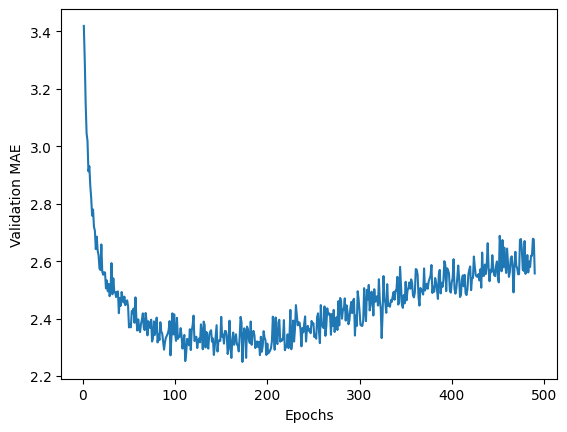

In [7]:
truncated_mae_history = average_mae_history[10:]

plt.clf()
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()



In [10]:
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=120,
    batch_size=16,
    verbose=0
)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.9376 - mae: 2.3558


In [11]:
print(test_mae_score)


2.559006690979004
